# Lecture 11 - Data Exploration and Preprocessing <a id="section0"/>

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_2-Data_Engineering/Lecture_11-Data_Exploration/Lecture_11-Data_Exploration_and_Preprocessing.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_2-Data_Engineering/Lecture_11-Data_Exploration/Lecture_11-Data_Exploration_and_Preprocessing.ipynb) 

<a id='top'></a>

- [11.1 Exploratory Data Analysis](#11.1-exploratory-data-analysis)
    - [11.1.1 Exploring Column Information](#11.1.1-exploring-column-information)
    - [11.1.2 Dealing with Missing Data](#11.1.2-dealing-with-missing-data)
    - [11.1.3 Checking Feature Distribution](#11.1.3-checking-feature-distribution)
    - [11.1.4 Checking Correlated Features](#11.1.4-checking-correlated-features)
- [11.2 Preprocessing Numerical Data](#11.2-preprocessing-numerical-data)
    - [11.2.1 Normalization](#11.2.1-normalization)
    - [11.2.2 Standardization](#11.2.2-standardization)
    - [11.2.3 Robust Scaling](#11.2.3-robust-scaling)
- [11.3 Preprocessing Categorical Data](#11.3-preprocessing-categorical-data)
    - [11.3.1 Mapping Method](#11.3.1-mapping-method)
    - [11.3.2 Ordinal Encoding](#11.3.2-ordinal-encoding)
    - [11.3.3 Label Encoding](#11.3.3-label-encoding)
    - [11.3.4 Pandas Dummies](#11.3.4-pandas-dummies)
    - [11.3.5 One-Hot Encoding](#11.3.5-one-hot-encoding)
- [11.4 Combining Numerical and Categorical Features](#11.4-combining-numerical-and-categorical-features)
- [References](#references)

## 11.1 Exploratory Data Analysis <a id="11.1-exploratory-data-analysis"/>

**Exploratory Data Analysis (EDA)** is an important step in all data science projects, and involves several exploratory steps to obtain a better understanding of the data. 

EDA typically includes: inspecting the summary statistics of the data, observing if there are missing values and adopting an appropriate strategy for handling them, checking the distribution of the features and whether there is a correlation between features, understanding which features are important and worth keeping and which ones are less important, and similar.  

To provide an example of EDA, we will use the `Titanic` dataset which can be loaded from the `Seaborn` datasets.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = sns.load_dataset('titanic')

Let's check the basic information about the data. There are 891 rows (samples) and 15 columns (features). We can see below the data types of each column. 

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Let's display the first five rows and the last five rows. Each row presents data for one passenger on Titanic.

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Let's also see the summary statistic. Recall that statistics are shown only for the columns with numerical data. 

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's assume that our task is to predict whether the passenger shown in the next cell survived. I.e., we will take the `survived` column to be the target, and we will implement a classification algorithm to predict it based on the other columns in the dataset.

In [7]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


### 11.1.1 Exploring Column Information <a id="11.1.1-exploring-column-information"/>

Let's first inspect some of the columns in the dataset.

Let's start with the `survived` column, where we can use the following code to find how many passengers survived and how many died.

In [8]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

It is often easier to understand the data if we plot the values. The pandas library provides basic plotting functions. For instance, in the next cell we created a bar plot by using `plot(kind='bar')` directly in pandas. The syntax for plotting in `pandas` is somewhat different than the `matplotlib` library, and admittedly, the functionality for plotting in pandas is limited. Both `matplotlib` and `Seaborn` libraries allow plotting directly using DataFrames and provide improved visualizations in comparison to `pandas` plots. 

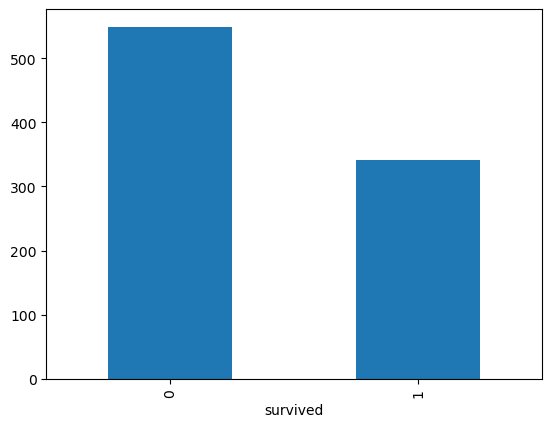

In [9]:
titanic['survived'].value_counts().plot(kind='bar');

Notice that there is a column called `alive` which is the same as the `survived` column. We need to remove this column from the data, otherwise the classifier model can just use the `alive` column to make predictions for the survived passengers, and will achieve very high accuracy. 

In [10]:
titanic['alive'].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [11]:
titanic.drop(['alive'], axis=1, inplace=True)

In [12]:
# verify the change
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


Also, there are two columns called `class` and `plass`. Let's examine how many passengers are in these columns.

In [13]:
titanic['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [14]:
titanic['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [15]:
# compare the two columns
p_class = titanic[['pclass', 'class']]
p_class.head(10)

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third
5,3,Third
6,1,First
7,3,Third
8,3,Third
9,2,Second


It seems that both of these columns are the same, except that one is numeric and the other contains text. Let's drop the `class` column. 

Removing columns that have the same information, also known as **redundant features**, can improve the performance of machine learning models. Specifically, redundant features can cause the model to overfit, as it may learn to rely too heavily on these features for making predictions. Also, having redundant features can lead to longer training times and higher computational complexity. 

In [16]:
titanic.drop('class', axis=1, inplace=True)

In [17]:
# verify the change
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,True


Let's explore the two columns `embarked` and `embark_town`.

In [18]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

They are the same, therefore, drop `embarked`.

In [20]:
titanic.drop('embarked', axis=1, inplace=True)

In [21]:
# verify the change
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


Let's plot the occurrences in `embark_town` in a bar plot. 

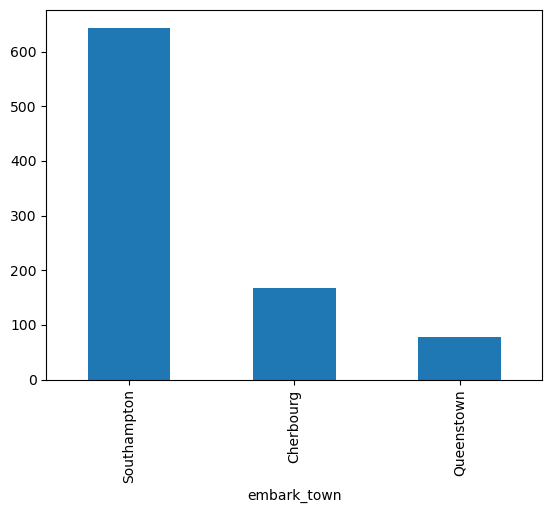

In [22]:
titanic['embark_town'].value_counts().plot(kind='bar');

Also, let's check how many men and women there are in the dataset.

In [23]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

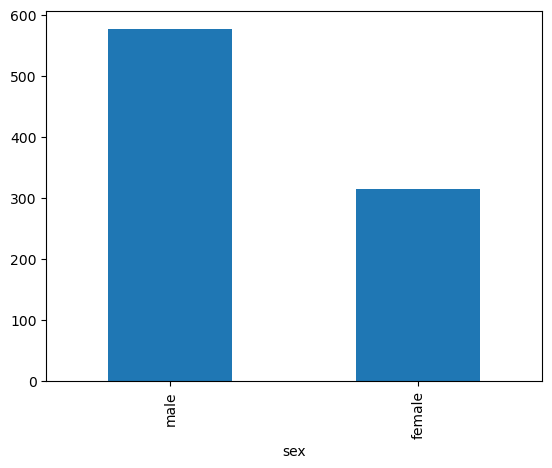

In [24]:
titanic['sex'].value_counts().plot(kind='bar');

In [25]:
titanic['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

We can note that the column `who` is similar to the `sex` column, but it also includes the number of children. 

As an exercise, let's show the categories of the column `who` using a Pie Chart to visualize their values.

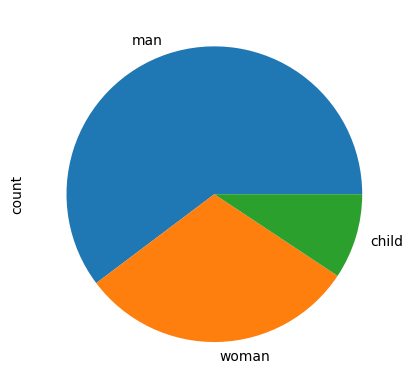

In [26]:
titanic.who.value_counts().plot(kind='pie');

There is another column `adult_male` which is similar, but different than `sex` and `who`. Since those columns provide different information, it may be beneficial to leave them all in the dataset that we will use later for model training.

In [27]:
titanic['adult_male'].value_counts()

adult_male
True     537
False    354
Name: count, dtype: int64

### 11.1.2 Dealing with Missing Data <a id="11.1.2-dealing-with-missing-data"/>

Let's check which columns have data missing.

In [28]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

There are missing data in `age`, `deck`, and `embark_town` columns. 

The `deck` column has missing values in most of the rows, and there isn't a reliable way to supply this information for the missing rows, thus, let's drop it. 

In [29]:
titanic.drop('deck', axis=1, inplace=True)

In [30]:
# verify the change
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


Since only 2 rows are missing in `embark town` let's remove those two rows. In the next cell we used `dropna` to remove only those rows that have missing values in the the `embark town` column. 

Recall again that to drop columns in pandas we use `axis=1` and to drop rows we use `axis=0.`

In [31]:
titanic.dropna(subset=['embark_town'], axis=0, inplace=True)

We can notice that the number of rows was reduced to 889 from the original 891, because of the removed 2 rows.

In [32]:
# verify the change
titanic.shape

(889, 11)

Now we have NaN values only in the `age` column. 

In [33]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
embark_town      0
alone            0
dtype: int64

There are several ways to deal with this issue. One is to replace the missing values in a column with the average value of the column, or with some other value (e.g., 0 in some cases, based on the type of data). 

Let's first explore the first option, and let's create a new DataFrame called `titanic_filled` that is a copy of the `titanic` DataFrame, and let's replace the missing values in the `age` column with the average age of the passengers. For this purpose we will use the method `fillna` that will calculate the mean and fill in the missing values. 

In [34]:
titanic_filled = titanic.copy()
titanic_filled['age'].fillna(titanic_filled['age'].mean(), inplace=True)

To verify the above, let's display several rows that have missing values for the `age`, and let's display below the DataFrame with the filled values. We can note that the average age is `29.64` years.

In [35]:
titanic.head(8)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
5,0,3,male,NaN,0,0,8.4583,man,True,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,man,True,Southampton,True
7,0,3,male,2.0,3,1,21.0750,child,False,Southampton,False


In [36]:
titanic_filled.head(8)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.000000,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.000000,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.000000,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.000000,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.000000,0,0,8.0500,man,True,Southampton,True
5,0,3,male,29.642093,0,0,8.4583,man,True,Queenstown,True
6,0,1,male,54.000000,0,0,51.8625,man,True,Southampton,True
7,0,3,male,2.000000,3,1,21.0750,child,False,Southampton,False


We can observe now that there are no missing values in the `titanic_filled` DataFrame. 

In [37]:
titanic_filled.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

Another alternative is to drop the rows with the missing values for the `age`. Let's explore this strategy as well. 

In general, we can try both strategies and check which one produces better results with the classification algorithm. 

After dropping the rows with missing values, 712 rows remain in the dataset. The method `reset_index` will change the index column to range from 0 to 711. If we didn't reset the index column, the index values would have still ranged from 0 to 891.

In [38]:
titanic.dropna(inplace=True)

In [39]:
titanic.reset_index(inplace=True)

In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        712 non-null    int64  
 1   survived     712 non-null    int64  
 2   pclass       712 non-null    int64  
 3   sex          712 non-null    object 
 4   age          712 non-null    float64
 5   sibsp        712 non-null    int64  
 6   parch        712 non-null    int64  
 7   fare         712 non-null    float64
 8   who          712 non-null    object 
 9   adult_male   712 non-null    bool   
 10  embark_town  712 non-null    object 
 11  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(3)
memory usage: 57.1+ KB


In [41]:
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


### 11.1.3 Checking Feature Distribution <a id="11.1.3-checking-feature-distribution"/>

Let's check the distribution of the numerical columns in the dataset, by plotting the histograms. For the columns with categorical data, such as `survived` and `pclass`, the histograms are equivalent to bar plots, and are less helpful. 

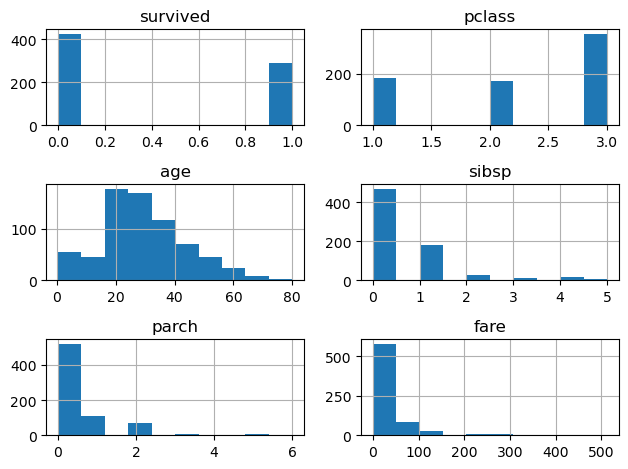

In [42]:
titanic[['survived','pclass','age','sibsp','parch','fare']].hist(bins=10)
plt.tight_layout()
plt.show()

Or, we can inspect the distribution of each feature. 

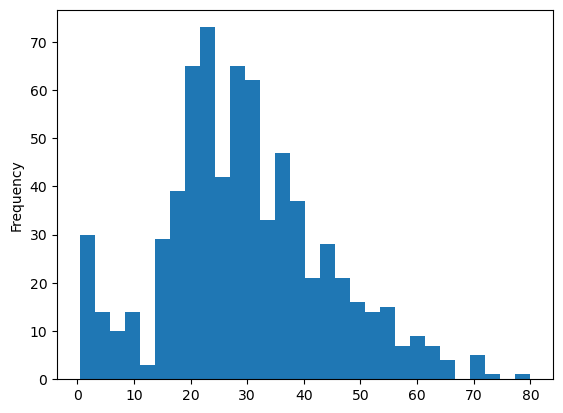

In [43]:
titanic['age'].plot(kind='hist', bins=30);

If we wish, we can use the `groupby` function in pandas, for instance, to show the counts for the `pclass` column grouped by `survived`.

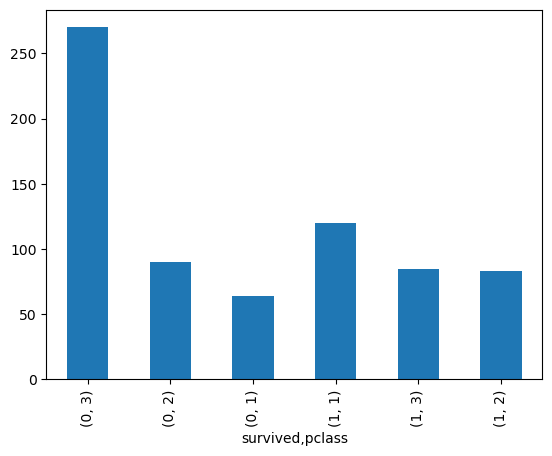

In [44]:
titanic.groupby('survived')['pclass'].value_counts().plot(kind="bar");

As we mentioned earlier, although the `pandas` library provides some functionality for plotting directly from DataFrames, other plotting libraries provide improved graphs. A few plots created with `Seaborn` are shown below. 

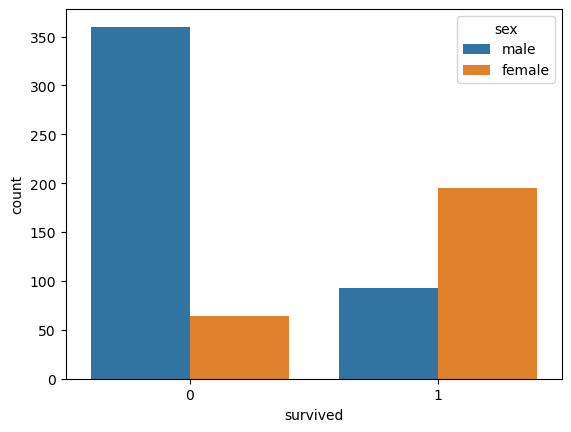

In [45]:
sns.countplot(data=titanic, x='survived', hue='sex');

In the next figure we can see a scatter plot of the `age`, grouped by `fare` and `class`. As expected, the fare in the first class was more expensive, in comparison to the second and third classes. 

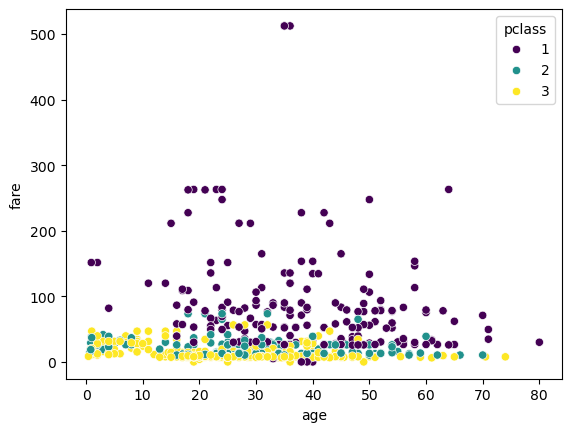

In [46]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='pclass', palette='viridis');

Visualization of the data during Exploratory Data Analysis is also a powerful tool for identyfing outliers. Understanding and addressing outliers in data is important for building robust and accurate machine learning models. In this dataset we don't see presense of outliers. 

### 11.1.4 Checking Correlated Features <a id="11.1.4-checking-correlated-features"/>

Checking correlations between the features in a dataset can help to identify similarities between the features. If two features have high correlation, that means they contain similar or perhaps the same information. Similar to our discussion on redundant features, two features that are highly correlated can be considered to contain redundant information. Thefore, it is recommended to remove one of the features to improve the performance of the machine learning algorithms.

We use the `corr()` method in pandas to check the correlation between the columns, as shown in the next cell, where we will consider only the columns that have numeric values. Based on the correlation values, there aren't columns that are highly correlated (e.g. with correlation greater than 0.7). One of the reasons is that we already dropped several columns that were similar or the same as other columns.

In [47]:
correlation = titanic.corr(numeric_only=True)
correlation

,index,survived,pclass,age,sibsp,parch,fare,adult_male,alone
index,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655,0.024069,0.059677
survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,-0.551151,-0.199741
pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,0.094635,0.150576
age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,0.286543,0.195766
sibsp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,-0.313016,-0.629408
parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,-0.365580,-0.577109
fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,-0.177446,-0.262799
adult_male,0.024069,-0.551151,0.094635,0.286543,-0.313016,-0.365580,-0.177446,1.000000,0.400718
alone,0.059677,-0.199741,0.150576,0.195766,-0.629408,-0.577109,-0.262799,0.400718,1.000000


If we observe the correlation for the column `survived`, we can see that it is most correlated with `adult_male`, `pclass`, `fare`, and `alone`, and less correlated with `age`, `sibsp` (siblings), and `parch` (parent or child).

In [48]:
correlation['survived']

index         0.029526
survived      1.000000
pclass       -0.356462
age          -0.082446
sibsp        -0.015523
parch         0.095265
fare          0.266100
adult_male   -0.551151
alone        -0.199741
Name: survived, dtype: float64

In [49]:
correlation['fare']

index         0.009655
survived      0.266100
pclass       -0.552893
age           0.093143
sibsp         0.139860
parch         0.206624
fare          1.000000
adult_male   -0.177446
alone        -0.262799
Name: fare, dtype: float64

The following heatmap shows the correlation between all features in a graph with a colorbar. 

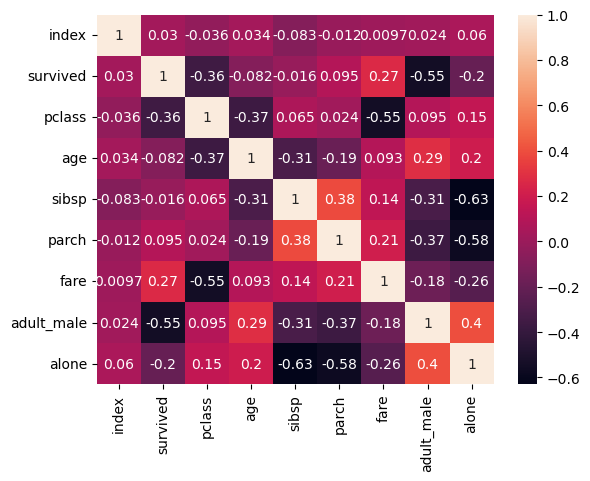

In [50]:
sns.heatmap(correlation, annot=True);

## 11.2 Preprocessing Numerical Data <a id="11.2-preprocessing-numerical-data"/>

Tabular data can be classified into two main categories:

- **Numerical data**: a quantity represented by a real or integer number.
- **Categorical data**: a discrete value, typically represented by string labels taken from a finite list of possible choices, but it is also possible to be represented by numbers from a discrete set of possible choices.

Most machine learning algorithms are sensitive to the range of values that are used for numerical inputs, and expect the input features to be scaled before processing. **Feature scaling** is transforming the numerical features into a standardized range of values. 

Common feature scaling techniques for numerical features include:

* Normalization
* Standardization
* Robust scaling

Whether or not a machine learning model requires scaling of the features depends on the model family. Linear models, such as logistic regression, generally benefit from scaling the features, while other models such as tree-based models (i.e., decision trees, random forests) do not need such preprocessing. 

### 11.2.1 Normalization <a id="11.2.1-normalization"/>

**Normalization** is a scaling technique that transforms numerical features into a range of values between 0 and 1. When we work with features that have different ranges of values, normalizing the features can enhance the performance of ML models. For example, if we have one feature (column) in the range from 100-1000, and another feature varies from 0.05-0.2, we can scale them so that they both have a range of values from 0 to 1. 

Normalizing data is performed using the following formula, where $X_{min}$ is the minimum value of feature $X$, and $X_{max}$ is the maximum value of $X$. 

$X_{\text{norm}} = \frac {X-X_{min}} {X_{max}-X_{min}}$

For illustration purposes of normalization, we will use the smaller dataset `tips` available in Seaborn. 

In [51]:
tip_data = sns.load_dataset('tips')
tip_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let's separate all numerical features from the above data into a new DataFrame `original_features`. 

In [52]:
original_features = tip_data[['total_bill', 'tip', 'size']]

To perform normalization, we will use the `scikit-learn` library which provides the function `MinMaxScaler()` to scale the data to the range between 0 and 1. That is the default range, but we can also select an arbitrary range to scale the data. 

The `fit` method in the code below first fits the data, i.e., for this task it calculates the minimum and maximum values for each column. 

Afterwards, the `transform` method scales the data, i.e., it uses the calculated minimum and maximum values for each column and substitutes them in the above formula to obtain scaled values of the data.

The syntax is `scaler.fit(data)` and `scaler.transform(data)`.

In [53]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

minmax_scaler.fit(original_features)

normalized_features = minmax_scaler.transform(original_features)

The output of `MinMaxScaler()` is a NumPy array, with the values in each column scaled in the range between 0 and 1.

In [54]:
type(normalized_features)

numpy.ndarray

Let's check the original and the normalized features.

In [55]:
# Show the first five rows in the original data 'total_bill', 'tip', and 'size'
original_features[:5]

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [56]:
# Show the first five rows in the normalized data 'total_bill', 'tip', and 'size'
# Convert the numpy array into a DataFrame first for displaying purpose only
pd.DataFrame(normalized_features[:5])

,0,1,2
0,0.291579,0.001111,0.2
1,0.152283,0.073333,0.4
2,0.375786,0.277778,0.4
3,0.431713,0.256667,0.2
4,0.450775,0.290000,0.6


The `scikit-learn` library also provides a combined method `fit_transform` which calls first `fit` and then `transform` in one step. This can be more efficient than calling `fit` and `transform` separately. The syntax is `scaler.fit_transform(data)`.

In [57]:
normalized_features_2 = minmax_scaler.fit_transform(original_features)

In [58]:
# Show the first five rows in 'total_bill', 'tip', and 'size'
# Convert the numpy array into a DataFrame first for displaying purpose only
pd.DataFrame(normalized_features_2[:5])

,0,1,2
0,0.291579,0.001111,0.2
1,0.152283,0.073333,0.4
2,0.375786,0.277778,0.4
3,0.431713,0.256667,0.2
4,0.450775,0.290000,0.6


### 11.2.2 Standardization <a id="11.2.2-standardization"/>

**Standardization** is another scaling technique where numerical features are rescaled to have 0 mean ($\mu$) and 1 standard deviation ($\sigma$ ). 

The formula for standardization is as follows: 

$X_{\text{std}} = \frac {X - \mu} {\sigma}$

where $X_{\text{std}}$ is the standardized feature, $X$ is the original feature, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation. 

Standardizing the features is preferred when we know that the training data has a normal (Gaussian) distribution. And, if the data does not have normal distribution, then normalization is a preferable scaling technique to standardization. 

With some machine learning algorithms the performance will be the same with features scaling using normalization or standardization, but with other algorithms, there can be a difference in the performance. If it is feasible, we can try both feature scaling techniques, especially if we are not sure about the distribution of the data.  

Standardization is implemented in `scikit-learn` with `StandardScaler`. Similar to `MinMaxScaler`, we can either use the syntax `scaler.fit_transform(data)` or the syntax with `scaler.fit(data)` and `scaler.transform(data)`.  A brief explanation of the differences between these two syntaxes is provided in Section 11.4 below, and we will provide an additional explanation in the next lecture when we introduce the concepts of training and testing datasets.

In [59]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

standardized_features = std_scaler.fit_transform(original_features)

In [60]:
standardized_features[:5]

array([[-0.31471131, -1.43994695, -0.60019263],
       [-1.06323531, -0.96920534,  0.45338292],
       [ 0.1377799 ,  0.36335554,  0.45338292],
       [ 0.4383151 ,  0.22575414, -0.60019263],
       [ 0.5407447 ,  0.4430195 ,  1.50695847]])

We can inspect the mean and standard variation of the original data using the `mean_` and `var_` attributes. The convention in scikit-learn is that if an attribute is learned from the data, its name ends with an underscore, as in `mean_` and `var_` for the `StandardScaler`. 

In [61]:
# The mean of each feature in the original data
std_scaler.mean_

array([19.78594262,  2.99827869,  2.56967213])

In [62]:
# The variance each feature in the original data
std_scaler.var_

array([78.92813149,  1.90660851,  0.9008835 ])

As expected, each column in the scaled data `standardized_features` has zero mean and unit variance.

In [63]:
# The mean of each feature in the scaled data
np.round(standardized_features.mean(axis=0))

array([-0.,  0., -0.])

In [64]:
# The variance each feature in the scaled data
np.round(standardized_features.std(axis=0))

array([1., 1., 1.])

It is easy to confuse normalization with standardization, since standardization rescales the data to have a normal distribution with mean 0 and standard deviation 1, therefore, pay attention and try not to mix up these two scaling techniques. 

### 11.2.3 Robust Scaling <a id="11.2.3-robust-scaling"/>

Scikit-learn provides another scaling method called `RobustScaler`, which is more suitable when the data contain many outliers. 

`RobustScaler` applies similar scaling to standardization, but it uses the median and the interquartile range (IQR) instead of the mean and standard deviation to scale the features. This makes it less sensitive to extreme values or outliers in the data. Recall the Interquartile Range(IQR) is the difference between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile).

$X_{\text{robust}} = \frac{X - \mathrm{median}}{\mathrm{IQR}}$

This means that the data in each column will be centered to have a median 0, and the interquartile range is equal to 1.

Because of that, `RobustScaler` is also more suitable for datasets with non-normal distributions. 

In [65]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
robust_scaled_features = rob_scaler.fit_transform(original_features)

In [66]:
robust_scaled_features[:5]

array([[-0.07467532, -1.2096    ,  0.        ],
       [-0.69155844, -0.7936    ,  1.        ],
       [ 0.29823748,  0.384     ,  1.        ],
       [ 0.54591837,  0.2624    ,  0.        ],
       [ 0.63033395,  0.4544    ,  2.        ]])

We can confirm that the columns in the scaled data have 0 median. 

In [67]:
np.round(np.median(robust_scaled_features, axis=0))

array([-0.,  0.,  0.])

The `MinMaxScaler`, `StandardScaler`, and `RobustScaler` in scikit-learn are also called **transformers**, since they are used to perform various data transformations on the original dataset before feeding the data into a machine learning model. Transformers are an essential part of the data processing in scikit-learn's pipeline.

## 11.3 Preprocessing Categorical Data <a id="11.3-preprocessing-categorical-data"/>

**Categorical data** contain a limited number of discrete categories. An example is the feature `who` in the `titanic` dataset that has three categories: `man`, `woman`, and `child`.

In many cases, categorical features have text values, and they need to be converted into numerical values in order to be processed by machine learning algorithms. 

We will look into the following techniques for converting categorical features into numerical features:

* Mapping method
* Ordinal encoding
* Label encoding
* Pandas dummies
* One-hot encoding

The first three techniques produce a single number for each category, and the last two techniques produce one-hot matrix. 

We are going to use again the Titanic dataset, which has several categorical features. 

In [68]:
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


### 11.3.1 Mapping Method <a id="11.3.1-mapping-method"/>

The mapping method is a straightforward way to encode categorical features when there are few categories. For instance, for the `who` feature, we will create a dictionary `map_dict` whose keys are the three categories `man`, `woman`, `child`, and they are mapped to numerical values 0, 1, and 2. 

In [69]:
titanic['who'].value_counts()

who
man      413
woman    216
child     83
Name: count, dtype: int64

In [70]:
map_dict = {'man': 0, 'woman': 1, 'child': 2}

The `map()` method is applied next to map the keys to values in the `who` column. 

In [71]:
titanic['who'] = titanic['who'].map(map_dict)

Notice below that the `who` feature is numerical, and all instances with the class `man` were replaced with `0`, and the same applies to the other two classes. 

In [72]:
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,0,True,Southampton,False
1,1,1,1,female,38.0,1,0,71.2833,1,False,Cherbourg,False
2,2,1,3,female,26.0,0,0,7.9250,1,False,Southampton,True
3,3,1,1,female,35.0,1,0,53.1000,1,False,Southampton,False
4,4,0,3,male,35.0,0,0,8.0500,0,True,Southampton,True


In [73]:
# verify that value_counts remained the same after the mapping
titanic['who'].value_counts()

who
0    413
1    216
2     83
Name: count, dtype: int64

### 11.3.2 Ordinal Encoding <a id="11.3.2-ordinal-encoding"/>

Ordinal encoding can be implemented with the `OrdinalEncoder` in scikit-learn, which automatically encodes each category with a different numerical value. This method is often preferred, since it is automated and less prone to errors.

Let's apply it to the columns `alone` and `adult_male`. 

In [74]:
titanic['alone'].value_counts()

alone
True     402
False    310
Name: count, dtype: int64

In [75]:
titanic['adult_male'].value_counts()

adult_male
True     413
False    299
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import OrdinalEncoder

# select the categorical columns to encode
categs_feats = titanic[['adult_male', 'alone']]

# initialize the Ordinal Encoder
encoder = OrdinalEncoder()

# fit the encoder and transform the categorical columns into numerical values
categs_encoded = encoder.fit_transform(categs_feats)

Alternatively, we can write the code in the above cell in one line, as in:

    categs_encoded = OrdinalEncoder().fit_transform(titanic[['adult_male', 'alone']])

The output of the `OrdinalEncoder` is a NumPy array `categs_encoded`, shown below.

In [77]:
categs_encoded

array([[1., 0.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 1.],
       [1., 1.]])

In the next cell, we will convert the NumPy array `categs_encoded` into pandas DataFrame. In this line, `columns=categs_feats.columns` specifies the column names for the DataFrame, and `index=categs_feats.index` specifies the row index for the DataFrame.

Note below that the text values in the columns `alone` and `adult_male` have been replaced with numeric values `0` or `1`.

In [78]:
titanic[['adult_male', 'alone']] = pd.DataFrame(categs_encoded, columns=categs_feats.columns, index=categs_feats.index)
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,0,1.0,Southampton,0.0
1,1,1,1,female,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0
2,2,1,3,female,26.0,0,0,7.9250,1,0.0,Southampton,1.0
3,3,1,1,female,35.0,1,0,53.1000,1,0.0,Southampton,0.0
4,4,0,3,male,35.0,0,0,8.0500,0,1.0,Southampton,1.0


In [79]:
# verify that value_counts remained the same after the mapping
titanic['alone'].value_counts()

alone
1.0    402
0.0    310
Name: count, dtype: int64

We can also check the applied mapping between the categories and the numerical values via the attribute `categories_`.

In [80]:
encoder.categories_

[array([False,  True]), array([False,  True])]

Note that `OrdinalEncoder` can not handle missing values, and if we try to apply it to a column with missing values, we will get an error.

Also, we need to be careful when applying this encoding strategy, because by default, `OrdinalEncoder` uses a lexicographical strategy to map string category labels to integers. For instance, suppose the dataset has a categorical variable named `"size"` with categories such as "S", "M", "L", "XL", and we would like the integer representation to respect the meaning of the sizes by mapping them to increasing integers such as `0, 1, 2, 3`. However, the lexicographical strategy used by default would map the labels "S", "M", "L", "XL" to 2, 1, 0, 3, by following the alphabetical order. To avoid that, we can pass  a list with the expected order for the `categories` argument for each feature. For example, `encoder = OrdinalEncoder(categories=["S", "M", "L", "XL"]`. 

If a categorical variable does not carry any meaningful order information, then we can consider using one-hot encoding described in the sections below. 

### 11.3.3 Label Encoding <a id="11.3.3-label-encoding"/>

Label encoding is used to encode categorical values in the target label column with the `LabelEncoder` in scikit-learn.

In this case, the target label column `survived` has numerical values, and it does not need to be encoded. Therefore, let's apply the `LabelEncoder` to the `embark_town` column, although that column is not the target column for our classification problem.

In [81]:
from sklearn.preprocessing import LabelEncoder

# select the target column to encode
target_feat = titanic[['embark_town']]

# initialize the label Encoder
label_encoder = LabelEncoder()

# fit the encoder and transform the target column into numerical values
target_encoded = label_encoder.fit_transform(target_feat)

If we wanted to simplify the code, we can write:

    target_encoded = LabelEncoder().fit_transform(titanic[['embark_town']])

Notice that when selecting the target column above we used double square brackets in `titanic[['embark_town']]`, although there is only one target column. This is because `LabelEncoder()` assumes 2-dimensional input, and not a 1-dimensional series. The same applies to `OrdinalEncoder()`, and the syntax requires to use double square brackets to provide 2-dimensional input. 

The output of Label Encoder is also a NumPy array. Let's convert it to a pandas dataframe, and add it as a new column `embark_town_ord`. 

In [82]:
titanic['embark_town_ord'] = pd.DataFrame(target_encoded, columns=target_feat.columns, index=target_feat.index)

titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,embark_town_ord
0,0,0,3,male,22.0,1,0,7.2500,0,1.0,Southampton,0.0,2
1,1,1,1,female,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0,0
2,2,1,3,female,26.0,0,0,7.9250,1,0.0,Southampton,1.0,2
3,3,1,1,female,35.0,1,0,53.1000,1,0.0,Southampton,0.0,2
4,4,0,3,male,35.0,0,0,8.0500,0,1.0,Southampton,1.0,2


In [83]:
label_encoder.classes_

array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)

In [84]:
titanic['embark_town_ord'].value_counts()

embark_town_ord
2    554
0    130
1     28
Name: count, dtype: int64

Although `Label Encoder` is similar to `Ordinal Encoder`, there are a few differences between the two functions. First, `Label Encoder` can handle only a single column at a time since it is assumed that there is one target variable, while `Ordinal Encoder` can encode multiple columns at the same time. Also, the output of `Label Encoder` is integer labels, and the output of `Ordinal Encoder` is floating-point numbers. The reason is that some ML algorithms require that the labels are integers, although most algorithms can accept both integers or floats as labels. 

##### Label Encoding in Pandas with `cat.codes`

Another alternative to Label Encoder for converting categorical values is by using the following syntax.

In [85]:
titanic['sex_codes'] = titanic['sex'].astype('category').cat.codes

In [86]:
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,embark_town_ord,sex_codes
0,0,0,3,male,22.0,1,0,7.2500,0,1.0,Southampton,0.0,2,1
1,1,1,1,female,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0,0,0
2,2,1,3,female,26.0,0,0,7.9250,1,0.0,Southampton,1.0,2,0
3,3,1,1,female,35.0,1,0,53.1000,1,0.0,Southampton,0.0,2,0
4,4,0,3,male,35.0,0,0,8.0500,0,1.0,Southampton,1.0,2,1


This code selects the `sex` column, and first converts the data into `category` data type with `.astype('category')`. Afterwards, `.cat.codes` assigns numerical codes to each category in the column. In this case, in the newly added column the numerical codes `1` and `0` and assigned to `male` and `female`.

Similarly to Label Encoder, this method can be applied only to a single column, and the assigned numbers are integer values. 

##### Label Encoding in Pandas with `factorize`

And one more approach for label encoding is shown below, where `.factorize` is used to convert categorical values into integer values. The values are inserted into the column `sex_factorize` on the right.

In [87]:
titanic['sex_factorize'] = pd.factorize(titanic['sex'])[0]

In [88]:
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,embark_town_ord,sex_codes,sex_factorize
0,0,0,3,male,22.0,1,0,7.2500,0,1.0,Southampton,0.0,2,1,0
1,1,1,1,female,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0,0,0,1
2,2,1,3,female,26.0,0,0,7.9250,1,0.0,Southampton,1.0,2,0,1
3,3,1,1,female,35.0,1,0,53.1000,1,0.0,Southampton,0.0,2,0,1
4,4,0,3,male,35.0,0,0,8.0500,0,1.0,Southampton,1.0,2,1,0


Let's drop the newly added columns.

In [89]:
titanic.drop(['sex_codes', 'sex_factorize'],axis=1, inplace=True)

### 11.3.4 Pandas Dummies <a id="11.3.4-pandas-dummies"/>

Pandas provides a function `get_dummies` that can be also used to handle categorical features. This function creates new columns based on the 
number of available categories in a target column. For example, let's apply it again to the column `sex`. 

In [90]:
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,embark_town_ord
0,0,0,3,male,22.0,1,0,7.2500,0,1.0,Southampton,0.0,2
1,1,1,1,female,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0,0
2,2,1,3,female,26.0,0,0,7.9250,1,0.0,Southampton,1.0,2
3,3,1,1,female,35.0,1,0,53.1000,1,0.0,Southampton,0.0,2
4,4,0,3,male,35.0,0,0,8.0500,0,1.0,Southampton,1.0,2


In [91]:
dummies = pd.get_dummies(titanic['sex'], dtype=float)

In [92]:
dummies

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
707,1.0,0.0
708,0.0,1.0
709,1.0,0.0
710,0.0,1.0


Concatenate the `dummies` DataFrame to `titanic` and drop the column `sex`.

In [93]:
titanic = pd.concat([titanic.drop('sex',axis=1),dummies], axis=1)

Note that new columns `female` and `male` with 1 and 0 values were added to the right of the DataFrame.

In [94]:
titanic.head()

,index,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alone,embark_town_ord,female,male
0,0,0,3,22.0,1,0,7.2500,0,1.0,Southampton,0.0,2,0.0,1.0
1,1,1,1,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0,0,1.0,0.0
2,2,1,3,26.0,0,0,7.9250,1,0.0,Southampton,1.0,2,1.0,0.0
3,3,1,1,35.0,1,0,53.1000,1,0.0,Southampton,0.0,2,1.0,0.0
4,4,0,3,35.0,0,0,8.0500,0,1.0,Southampton,1.0,2,0.0,1.0


This type of encoding is also called one-hot encoding, where each category (unique value) in the column `sex` became a column, and for each row (sample), 1 specifies the category to which it belongs.

### 11.3.5 One-Hot Encoding <a id="11.3.5-one-hot-encoding"/>

Scikit-learn provides a function `OneHotEncoder` that converts a feature into one-hot matrix. As with the pandas dummies, additional columns corresponding to the values of the given categories are created. 

Let's apply it to `embark_town`.

In [95]:
titanic['embark_town'].value_counts()

embark_town
Southampton    554
Cherbourg      130
Queenstown      28
Name: count, dtype: int64

In [96]:
titanic.head()

,index,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alone,embark_town_ord,female,male
0,0,0,3,22.0,1,0,7.2500,0,1.0,Southampton,0.0,2,0.0,1.0
1,1,1,1,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0,0,1.0,0.0
2,2,1,3,26.0,0,0,7.9250,1,0.0,Southampton,1.0,2,1.0,0.0
3,3,1,1,35.0,1,0,53.1000,1,0.0,Southampton,0.0,2,1.0,0.0
4,4,0,3,35.0,0,0,8.0500,0,1.0,Southampton,1.0,2,0.0,1.0


In [97]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

onehot_encoded = one_hot.fit_transform(titanic[['embark_town']])

In [98]:
one_hot.categories_

[array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)]

In [99]:
onehot_encoded

<712x3 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

The output of OneHotEncoder is a sparse matrix. We will need to convert it into NumPy array first, and afterward we can convert it into pandas DataFrame. 

In [100]:
onehot_encoded = onehot_encoded.toarray()

In [101]:
columns = list(one_hot.categories_)

town_df = pd.DataFrame(onehot_encoded, columns=columns)

town_df.head()

,Cherbourg,Queenstown,Southampton
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [102]:
titanic.drop('embark_town',axis=1, inplace=True)

In [103]:
titanic[['Cherbourg', 'Queenstown', 'Southampton']] = town_df

In [104]:
titanic.head()

,index,survived,pclass,age,sibsp,parch,fare,who,adult_male,alone,embark_town_ord,female,male,Cherbourg,Queenstown,Southampton
0,0,0,3,22.0,1,0,7.2500,0,1.0,0.0,2,0.0,1.0,0.0,0.0,1.0
1,1,1,1,38.0,1,0,71.2833,1,0.0,0.0,0,1.0,0.0,1.0,0.0,0.0
2,2,1,3,26.0,0,0,7.9250,1,0.0,1.0,2,1.0,0.0,0.0,0.0,1.0
3,3,1,1,35.0,1,0,53.1000,1,0.0,0.0,2,1.0,0.0,0.0,0.0,1.0
4,4,0,3,35.0,0,0,8.0500,0,1.0,1.0,2,0.0,1.0,0.0,0.0,1.0


### Choosing an Encoding Strategy

When working with categorical data in machine learning, choosing an encoding strategy depends on the nature of the categorical features and the type of machine learning models used. 

Ordinal encoding maintains an order in the data categories and it is suitable when categories have a meaningful order, called **ordinal categories**. For example, a column with categories `low < medium < high`, or the column `pclass` in `titanic` having First, Second, and Third class categories. The impact of violating the ordering assumption varies by model and should be considered carefully. Tree-based ML models, such as Decision Trees, Random Forest, and Gradient Boosting Ensembles handle well ordinal encoded data, because these models can split the data based on the order of categories. 

One-hot encoding is suitable when categories don't have natural order, also called **nominal categories**. For example, the column `sex` in `titanic` having male and female categories, or the column `embarked` having Chebourg, Queenstown, and Southampton, where the categories don't have inherent ranking. This encoding can cause computational inefficiency in tree-based models if the number of categories is large. Linear ML models, such as Logistic Regression, Linear Regression, and Support Vector Machines work well with one-hot encoding, as these models treat each category independently, and they do not assume order between categories. 

## 11.4 Combining Numerical and Categorical Features <a id="11.4-combining-numerical-and-categorical-features"/>

Now let's prepare the numerical and categorical data in the `titanic` dataset and train a classification model.

First, assign the `survived` column to be the target label `y`.

In [105]:
y = titanic['survived']

We will use the other columns to be data features `X`, therefore let's drop the `survived` column and the `index` column.

It is very important to always remove the `index` column from the data used for training a model. If we leave the `index` column in the data, the model can learn to associate the target labels with the index of each data point (row). 

In [106]:
X = titanic.drop(['survived', 'index'], axis=1)

In [107]:
X

,pclass,age,sibsp,parch,fare,who,adult_male,alone,embark_town_ord,female,male,Cherbourg,Queenstown,Southampton
0,3,22.0,1,0,7.2500,0,1.0,0.0,2,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1,0.0,0.0,0,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1,0.0,1.0,2,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1,0.0,0.0,2,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0,1.0,1.0,2,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,3,39.0,0,5,29.1250,1,0.0,0.0,1,1.0,0.0,0.0,1.0,0.0
708,2,27.0,0,0,13.0000,0,1.0,1.0,2,0.0,1.0,0.0,0.0,1.0
709,1,19.0,0,0,30.0000,1,0.0,1.0,2,1.0,0.0,0.0,0.0,1.0
710,1,26.0,0,0,30.0000,0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0


We will first split the dataset into a training and test dataset. This step will be explained in more detail in the next lectures. The objective of this lecture is to learn how to preprocess the data and prepare it for model fitting. 

In [108]:
from sklearn.model_selection import train_test_split

# split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y)

In [109]:
print('Training data inputs', X_train.shape)
print('Training labels', y_train.shape)
print('Testing data inputs', X_test.shape)
print('Testing labels', y_test.shape)

Training data inputs (534, 14)
Training labels (534,)
Testing data inputs (178, 14)
Testing labels (178,)


Let's apply standard scaling to the training and test datasets. Notice here that we apply `fit()` only to the training dataset, then `transform()` to the training dataset, and we apply only `transform()` to the test dataset. The reason for this is that if we applied `fit` or `fit_transform` to the test dataset, we would learn some information about the test set (e.g., we can learn the maximum and minimum values in the test dataset). However, it is assumed that the machine learning algorithm learns only from the training dataset, and that during the training, the model does not have access to the test dataset. I.e., it is said that the model "sees" only the training dataset during fitting the model to the data, and the test dataset is "unseen" during the model fitting phase. This will be explained again in the next lecture.

In [110]:
# Apply StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, let's apply k-Nearest Neighbor classifier from the scikit-learn library. The function `fit()` is used to fit the model to the data.

In [111]:
from sklearn import neighbors

# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


The function `score()` is used to predict the accuracy of the model. The model can predict whether a passenger survived with an accuracy of 82.58%.

In [112]:
# score on test set
accuracy = knn_model.score(X_test_scaled, y_test)
print('The test accuracy of k-Nearest Neighbors is {0:5.2f} %'.format(accuracy*100))

The test accuracy of k-Nearest Neighbors is 82.58 %


Next, let's use the trained model to predict the `survived` labels for the first 10 passengers in the `X_test` dataset.

In [113]:
# Make predictions on the test data
y_pred = knn_model.predict(X_test_scaled[:10])

In [114]:
# Show the predictions
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [115]:
# Show the actual values from the 'survived' column
np.array(y_test[:10])

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

As we can see, for the first 10 samples, the model predicted correctly the target label for 7 samples. 

In our next lecture on `scikit-learn` we will explain in more detail how to perform classification with machine learning models.

## References <a id="references"/>

1. Complete Machine Learning Package, Jean de Dieu Nyandwi, available at: [https://github.com/Nyandwi/machine_learning_complete](https://github.com/Nyandwi/machine_learning_complete).
2. Advanced Python for Data Science, University of Cincinnati, available at: [https://github.com/uc-python/advanced-python-datasci](https://github.com/uc-python/advanced-python-datasci).
3. Python Machine Learning (2nd Ed.) Code Repository, Sebastian Raschka, available at: [https://github.com/rasbt/python-machine-learning-book-2nd-edition](https://github.com/rasbt/python-machine-learning-book-2nd-edition). 

[BACK TO TOP](#top)